In [1]:
# Secured Text-Based CAPTCHA with Style Transfer - Final Fixed Version
# Using Google Drive for dataset storage

# Install required packages
!pip install -q tensorflow matplotlib numpy

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
=== Generating 10 CAPTCHA(s) ===

Processing CAPTCHA: 5nxnn
Using style: Places365_val_00006916.jpg
Iter 0: Total Loss=8371291.50, Content=0.00, Style=167425835008.00
Iter 10: Total Loss=14606225408.00, Content=145999.84, Style=124818546688.00
Iter 20: Total Loss=9669548032.00, Content=96638.28, Style=114393407488.00
Iter 30: Total Loss=7028020736.00, Content=70223.29, Style=113833000960.00
Iter 40: Total Loss=5336803840.00, Content=53310.01, Style=116050927616.00


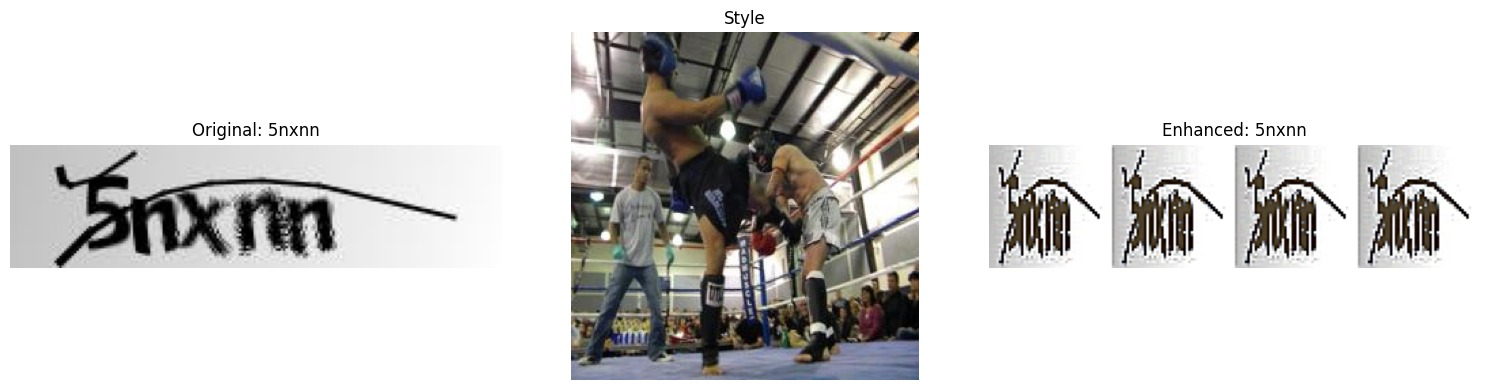


Processing CAPTCHA: e3ndn
Using style: Places365_val_00013603.jpg
Iter 0: Total Loss=8121499.50, Content=0.00, Style=162429992960.00
Iter 10: Total Loss=14647859200.00, Content=146422.34, Style=112492314624.00
Iter 20: Total Loss=9708661760.00, Content=97033.76, Style=105718702080.00
Iter 30: Total Loss=6946773504.00, Content=69413.28, Style=108916367360.00
Iter 40: Total Loss=5295127040.00, Content=52894.46, Style=113612767232.00


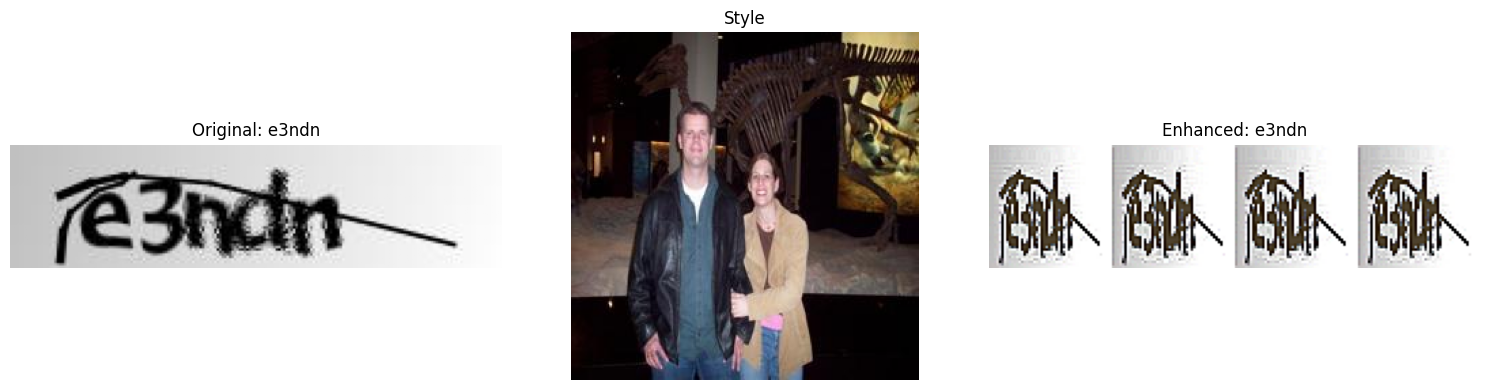


Processing CAPTCHA: 373gb
Using style: 2066389640_c0b2e42f40.jpg
Iter 0: Total Loss=8215688.50, Content=0.00, Style=164313776128.00
Iter 10: Total Loss=14184685568.00, Content=141824.05, Style=45603246080.00
Iter 20: Total Loss=9252562944.00, Content=92497.79, Style=55676407808.00
Iter 30: Total Loss=6622347264.00, Content=66190.13, Style=66687180800.00
Iter 40: Total Loss=5034341888.00, Content=50305.31, Style=76220473344.00


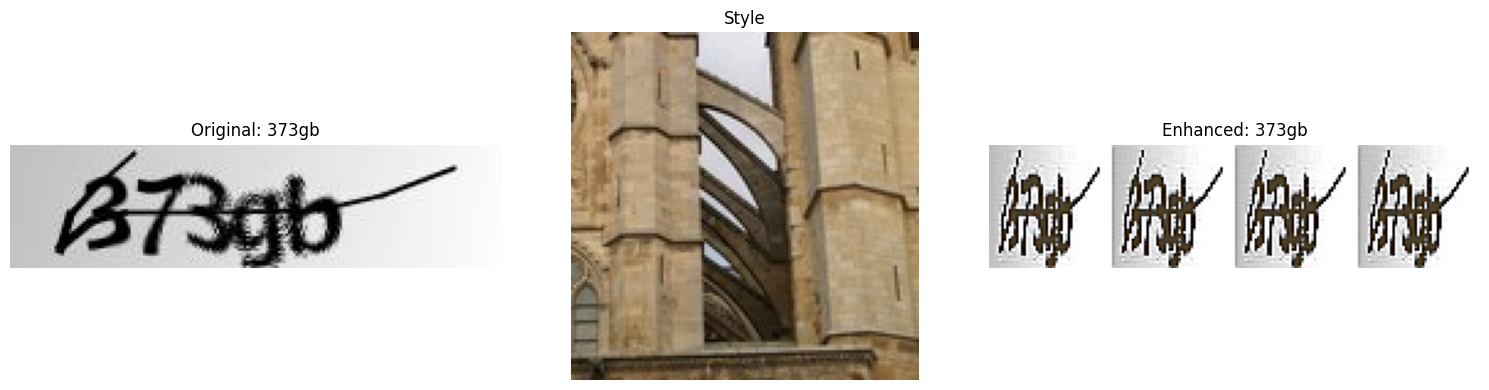


Processing CAPTCHA: xe8xm
Using style: 1804.jpg
Iter 0: Total Loss=10618981.00, Content=0.00, Style=212379631616.00
Iter 10: Total Loss=13511455744.00, Content=135090.31, Style=48499384320.00
Iter 20: Total Loss=9218991104.00, Content=92154.57, Style=70675062784.00
Iter 30: Total Loss=6725336576.00, Content=67210.47, Style=85789646848.00
Iter 40: Total Loss=5133904896.00, Content=51288.79, Style=100519952384.00


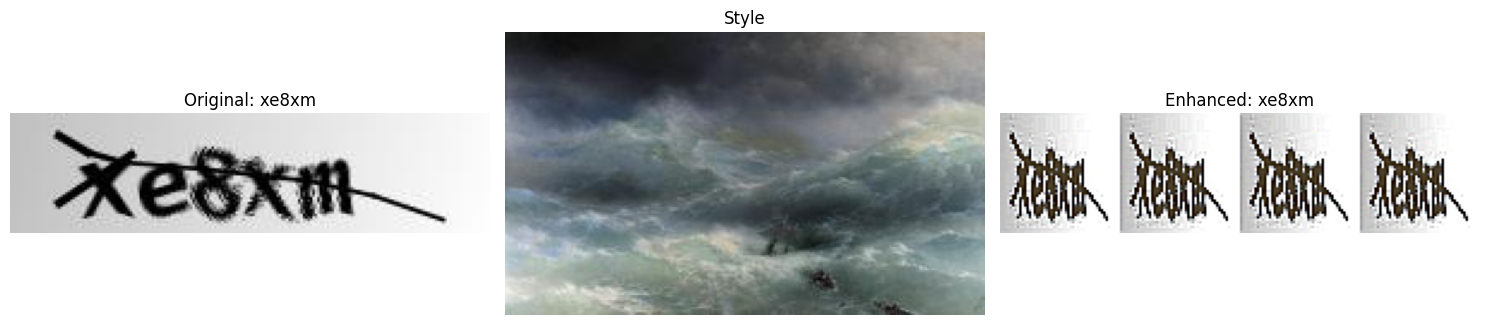


Processing CAPTCHA: d236n
Using style: 13882263434_774a7c67ed_m.jpg
Iter 0: Total Loss=4810662.00, Content=0.00, Style=96213237760.00
Iter 10: Total Loss=14992411648.00, Content=149899.69, Style=48864280576.00
Iter 20: Total Loss=10156119040.00, Content=101539.80, Style=42780569600.00
Iter 30: Total Loss=7276125184.00, Content=72738.70, Style=45101793280.00
Iter 40: Total Loss=5528339456.00, Content=55259.09, Style=48621600768.00


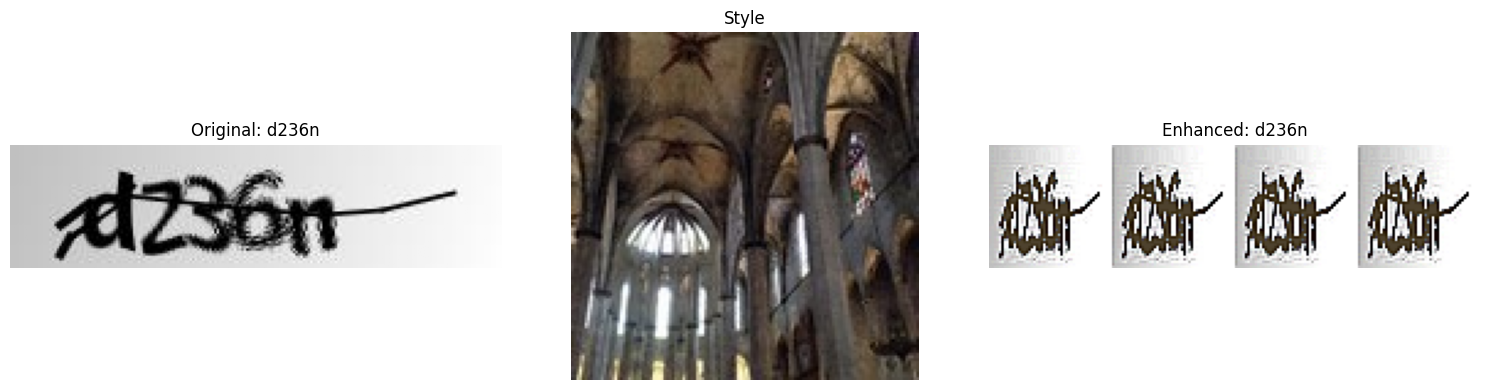


Processing CAPTCHA: 6c3n6
Using style: Places365_val_00006500.jpg
Iter 0: Total Loss=7488733.00, Content=0.00, Style=149774663680.00
Iter 10: Total Loss=14366767104.00, Content=143645.78, Style=43782754304.00
Iter 20: Total Loss=9848324096.00, Content=98454.66, Style=57163038720.00
Iter 30: Total Loss=7173918720.00, Content=71706.82, Style=64734208000.00
Iter 40: Total Loss=5553587712.00, Content=55499.45, Style=72842682368.00


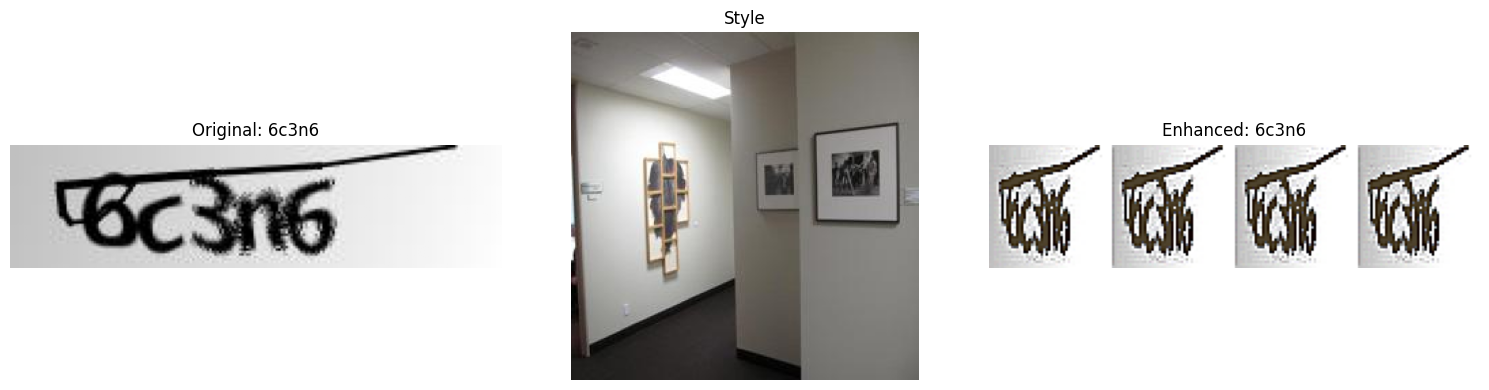


Processing CAPTCHA: 4f8yp
Using style: Places365_val_00014247.jpg
Iter 0: Total Loss=8344952.50, Content=0.00, Style=166899056640.00
Iter 10: Total Loss=13671267328.00, Content=136694.69, Style=35954651136.00
Iter 20: Total Loss=8967144448.00, Content=89647.14, Style=48592166912.00
Iter 30: Total Loss=6434072064.00, Content=64309.30, Style=62844682240.00
Iter 40: Total Loss=4948897280.00, Content=49451.18, Style=75586281472.00


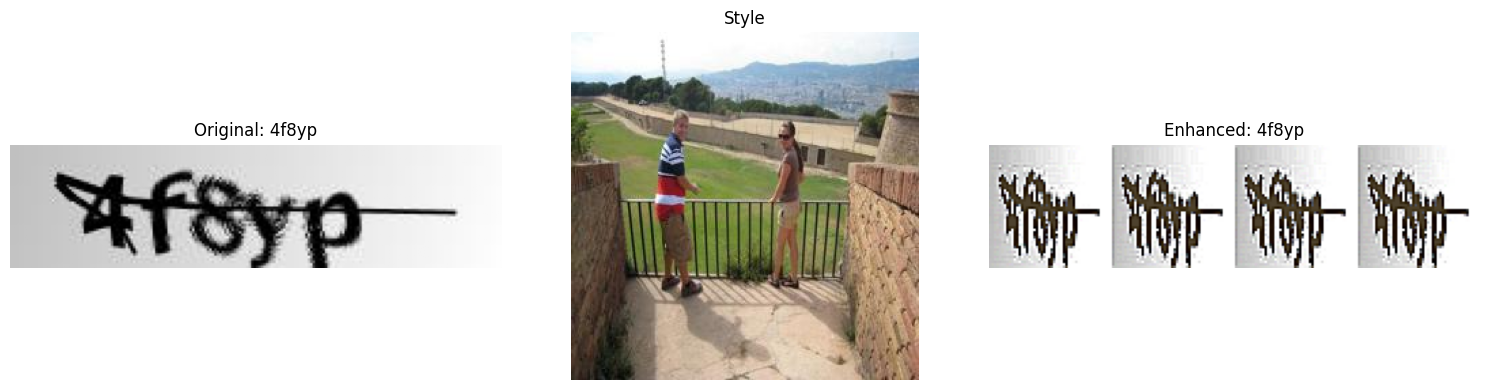


Processing CAPTCHA: 537nf
Using style: 262 (2).jpg
Iter 0: Total Loss=16892686.00, Content=0.00, Style=337853743104.00
Iter 10: Total Loss=13055989760.00, Content=130366.24, Style=387314778112.00
Iter 20: Total Loss=8872709120.00, Content=88550.06, Style=354055421952.00
Iter 30: Total Loss=6493394944.00, Content=64761.52, Style=344863473664.00
Iter 40: Total Loss=5002085376.00, Content=49851.75, Style=338220417024.00


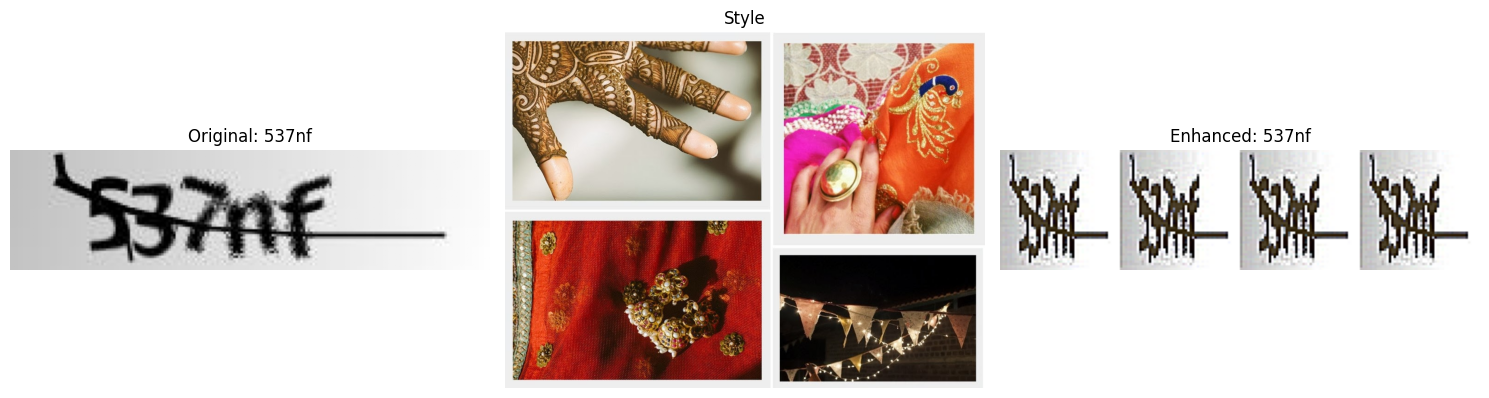


Processing CAPTCHA: ndme7
Using style: 4EOqZsQdwtUMBLFtFYQ5.jpg
Iter 0: Total Loss=12072783.00, Content=0.00, Style=241455661056.00
Iter 10: Total Loss=15307815936.00, Content=153036.70, Style=82896961536.00
Iter 20: Total Loss=10197556224.00, Content=101923.73, Style=103663648768.00
Iter 30: Total Loss=7301160448.00, Content=72952.43, Style=118349807616.00
Iter 40: Total Loss=5524121600.00, Content=55175.46, Style=131516194816.00


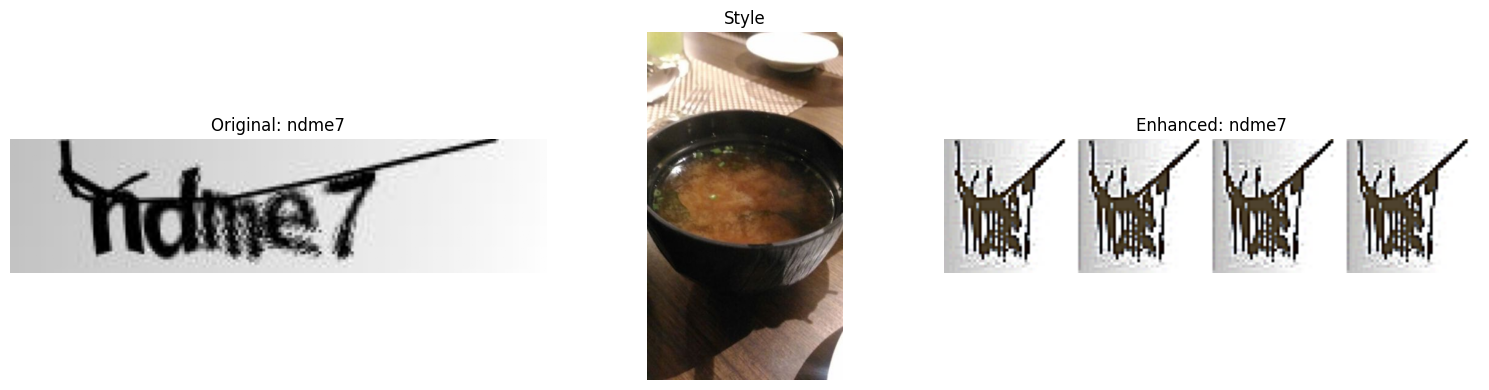


Processing CAPTCHA: ng2gw
Using style: HWqOcdFl7LeDWIEO0YiB.jpeg
Iter 0: Total Loss=9187248.00, Content=0.00, Style=183744970752.00
Iter 10: Total Loss=16397138944.00, Content=163911.23, Style=120315527168.00
Iter 20: Total Loss=10727718912.00, Content=107219.13, Style=116114030592.00
Iter 30: Total Loss=7652709376.00, Content=76466.91, Style=120365006848.00
Iter 40: Total Loss=5752303616.00, Content=57459.79, Style=126489427968.00


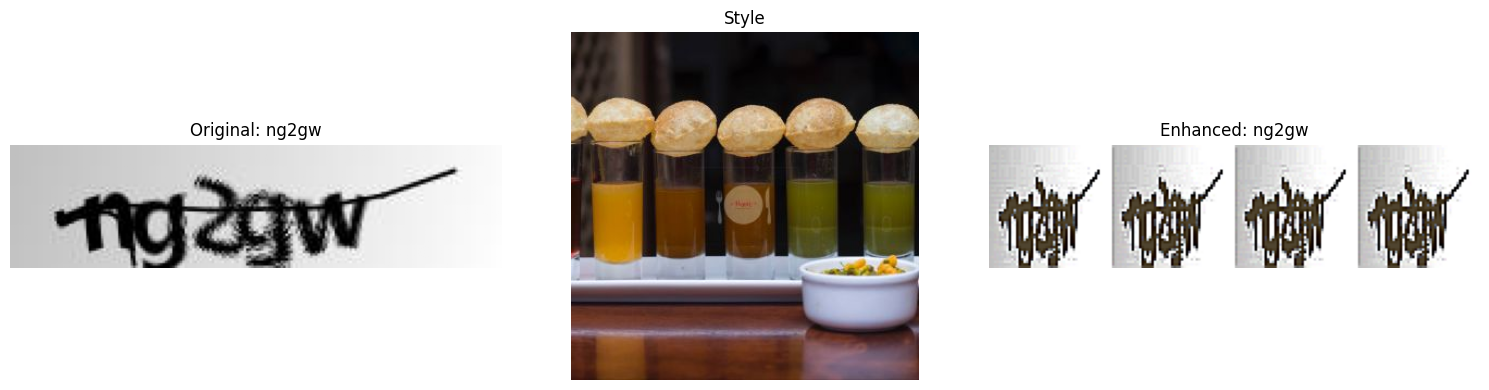

In [5]:
# === IMPORTS ===
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import vgg19
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from PIL import Image, ImageDraw, ImageFont, ImageEnhance, ImageFilter
import random
import matplotlib.pyplot as plt
from google.colab import drive

# === MOUNT GOOGLE DRIVE ===
drive.mount('/content/drive')

# === PATH SETUP ===
DATASET_PATH = '/content/drive/MyDrive/captcha_samples'
STYLE_ROOT_FOLDER = '/content/drive/MyDrive/Google Scraped'
OUTPUT_PATH = '/content/drive/MyDrive/enhanced_captchas'
os.makedirs(OUTPUT_PATH, exist_ok=True)

# === CONSTANTS ===
IMAGE_WIDTH = 200
IMAGE_HEIGHT = 50
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
CONTENT_WEIGHT = 1e5
STYLE_WEIGHT = 5e-5

# === STYLE TRANSFER MODEL ===
class StyleTransferModel:
    def __init__(self):
        self.content_layer = 'block4_conv2'
        self.style_layers = ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1']
        self.model = self.build_model()

    def build_model(self):
        vgg = vgg19.VGG19(include_top=False, weights='imagenet')
        vgg.trainable = False
        style_outputs = [vgg.get_layer(name).output for name in self.style_layers]
        content_output = vgg.get_layer(self.content_layer).output
        return tf.keras.models.Model(vgg.input, [style_outputs, content_output])

    def preprocess_image(self, image_path):
        img = load_img(image_path, target_size=IMAGE_SIZE)
        img = img_to_array(img)
        img = np.expand_dims(img, axis=0)
        img = vgg19.preprocess_input(img)
        return tf.convert_to_tensor(img)

    def deprocess_image(self, x):
        x = x.numpy().reshape((IMAGE_HEIGHT, IMAGE_WIDTH, 3))
        x[:, :, 0] += 103.939
        x[:, :, 1] += 116.779
        x[:, :, 2] += 123.68
        x = x[:, :, ::-1]
        return np.clip(x, 0, 255).astype('uint8')

    def gram_matrix(self, input_tensor):
        channels = int(input_tensor.shape[-1])
        a = tf.reshape(input_tensor, [-1, channels])
        n = tf.cast(tf.shape(a)[0], tf.float32)
        gram = tf.matmul(a, a, transpose_a=True)
        return gram / n

    def compute_loss(self, generated_image, style_targets, content_target):
        style_outputs, content_output = self.model(generated_image)
        content_loss = tf.reduce_mean((content_output - content_target)**2)
        style_loss = sum(tf.reduce_mean((self.gram_matrix(out) - tgt)**2)
                         for out, tgt in zip(style_outputs, style_targets))
        style_loss /= len(self.style_layers)
        total_loss = CONTENT_WEIGHT * content_loss + STYLE_WEIGHT * style_loss
        return total_loss, content_loss, style_loss

    def transfer_style(self, content_path, style_path, iterations=50, learning_rate=2.0):
        content_image = self.preprocess_image(content_path)
        style_image = self.preprocess_image(style_path)
        generated_image = tf.Variable(content_image)
        style_targets, _ = self.model(style_image)
        _, content_target = self.model(content_image)
        style_targets = [self.gram_matrix(t) for t in style_targets]
        opt = tf.optimizers.Adam(learning_rate)
        best_loss = float('inf')
        best_image = None

        for i in range(iterations):
            with tf.GradientTape() as tape:
                total_loss, c_loss, s_loss = self.compute_loss(generated_image, style_targets, content_target)
            grads = tape.gradient(total_loss, generated_image)
            opt.apply_gradients([(grads, generated_image)])
            generated_image.assign(tf.clip_by_value(generated_image, 0.0, 255.0))
            if total_loss < best_loss:
                best_loss = total_loss
                best_image = self.deprocess_image(generated_image)
            if i % 10 == 0:
                print(f"Iter {i}: Total Loss={total_loss:.2f}, Content={c_loss:.2f}, Style={s_loss:.2f}")
        return best_image

# === CAPTCHA GENERATOR ===
class CAPTCHAGenerator:
    def __init__(self, dataset_path=DATASET_PATH):
        self.dataset_path = dataset_path
        self.style_model = StyleTransferModel()
        self.style_images = self.load_style_images()

    def load_style_images(self):
        styles = []
        for root, _, files in os.walk(STYLE_ROOT_FOLDER):
            for file in files:
                if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                    styles.append(os.path.join(root, file))
        if not styles:
            raise FileNotFoundError(f"No style images found in {STYLE_ROOT_FOLDER}")
        return styles

    def get_random_captcha(self):
        captcha_files = [f for f in os.listdir(self.dataset_path) if f.endswith('.png')]
        if not captcha_files:
            raise FileNotFoundError("No CAPTCHA images found.")
        selected = random.choice(captcha_files)
        return os.path.join(self.dataset_path, selected), os.path.splitext(selected)[0]

    def enhance_output(self, image_array):
        img = Image.fromarray(image_array)
        img = img.filter(ImageFilter.SHARPEN)
        img = ImageEnhance.Contrast(img).enhance(1.6)
        return img

    def generate_enhanced_captcha(self):
        captcha_path, captcha_text = self.get_random_captcha()
        style_path = random.choice(self.style_images)
        print(f"\nProcessing CAPTCHA: {captcha_text}")
        print(f"Using style: {os.path.basename(style_path)}")

        enhanced_array = self.style_model.transfer_style(captcha_path, style_path)
        enhanced_img = self.enhance_output(enhanced_array)

        output_path = os.path.join(OUTPUT_PATH, f"enhanced_{captcha_text}.png")
        enhanced_img.save(output_path)
        return captcha_path, style_path, output_path, captcha_text

# === MAIN ===
def main(num_captchas=10):  # 🔁 Change this to generate more/less CAPTCHAs
    print(f"=== Generating {num_captchas} CAPTCHA(s) ===")
    generator = CAPTCHAGenerator()

    for i in range(num_captchas):
        try:
            original_path, style_path, enhanced_path, text = generator.generate_enhanced_captcha()

            plt.figure(figsize=(15, 4))
            plt.subplot(1, 3, 1)
            plt.imshow(plt.imread(original_path))
            plt.title(f"Original: {text}")
            plt.axis('off')

            plt.subplot(1, 3, 2)
            plt.imshow(plt.imread(style_path))
            plt.title("Style")
            plt.axis('off')

            plt.subplot(1, 3, 3)
            plt.imshow(plt.imread(enhanced_path))
            plt.title(f"Enhanced: {text}")
            plt.axis('off')

            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"❌ Error: {e}")

if __name__ == "__main__":
    main(num_captchas=10)  # ⬅️ Change this number to generate more or fewer CAPTCHAs
